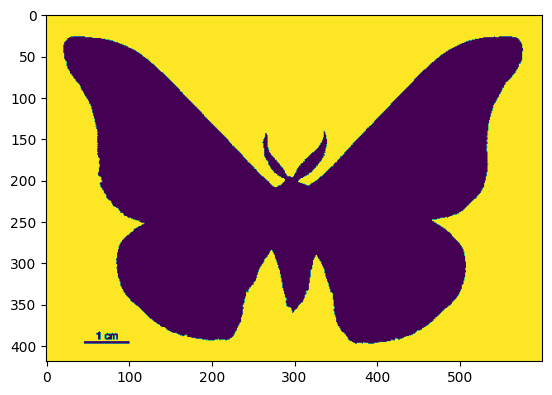

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from shapely import Polygon
from shapely import affinity

moth = cv2.imread("moth.jpg", cv2.IMREAD_GRAYSCALE)
(_, moth_bw) = cv2.threshold(moth, 240, 255, cv2.THRESH_BINARY)
plt.imshow(moth_bw)
plt.show()

In [2]:
contours,_ = cv2.findContours(moth_bw, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

6


(419, 600)


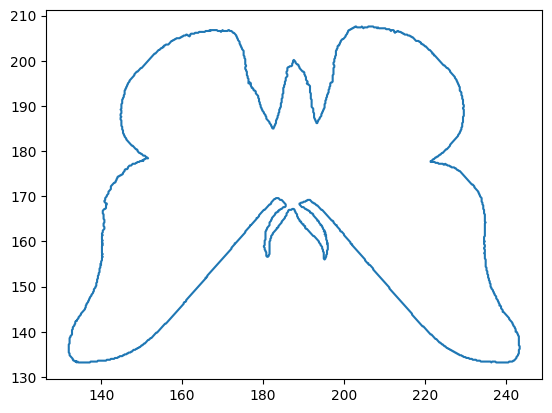

In [3]:
print(moth_bw.shape)
moth_poly =  Polygon(np.squeeze(contours[4]))
moth_poly = affinity.translate(
    affinity.scale(moth_poly, xfact=0.2,yfact=0.2, origin=(0,0)),
    xoff=128, yoff=128
)

plt.plot(*moth_poly.exterior.xy)

In [4]:
from shapely import to_geojson
import json

with open("moth_data.json", "w") as moth_file:
    json.dump(json.loads(to_geojson(moth_poly)), moth_file)

{'type': 'Polygon', 'coordinates': [[[133.8, 133.4], [134.0, 133.2], [134.2, 133.4], [134.4, 133.2], [134.6, 133.2], [134.8, 133.2], [135.0, 133.2], [135.2, 133.2], [135.4, 133.2], [135.6, 133.2], [135.8, 133.2], [136.0, 133.2], [136.2, 133.2], [136.4, 133.2], [136.6, 133.2], [136.8, 133.2], [137.0, 133.2], [137.2, 133.2], [137.4, 133.4], [137.6, 133.4], [137.8, 133.4], [138.0, 133.4], [138.2, 133.4], [138.4, 133.4], [138.6, 133.4], [138.8, 133.4], [139.0, 133.4], [139.2, 133.6], [139.4, 133.6], [139.6, 133.6], [139.8, 133.6], [140.0, 133.6], [140.2, 133.6], [140.4, 133.6], [140.6, 133.6], [140.8, 133.6], [141.0, 133.6], [141.2, 133.6], [141.4, 133.8], [141.6, 133.8], [141.8, 133.8], [142.0, 133.8], [142.2, 133.8], [142.4, 134.0], [142.6, 134.0], [142.8, 134.0], [143.0, 134.0], [143.2, 134.0], [143.4, 134.2], [143.6, 134.2], [143.8, 134.2], [144.0, 134.2], [144.2, 134.4], [144.4, 134.4], [144.6, 134.6], [144.8, 134.6], [145.0, 134.6], [145.2, 134.6], [145.4, 134.8], [145.6, 134.8], [14

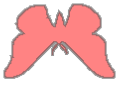

In [5]:
with open("moth_data.json", "r") as moth_data_file:
    moth_data = json.load(moth_data_file)
    print(moth_data)
Polygon(tuple(map(lambda coordinate: (int(coordinate[0]), int(coordinate[1])), moth_data.get("coordinates")[0])))